In [0]:
import keras

In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [0]:
batch_size = 100
num_classes = 10
epochs = 15
num_predictions = 20

In [235]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [0]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [0]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [243]:
history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 28s 563us/step - loss: 1.8368 - acc: 0.3246 - val_loss: 1.4933 - val_acc: 0.4550
Epoch 2/15
50000/50000 [==============================] - 20s 394us/step - loss: 1.3926 - acc: 0.4980 - val_loss: 1.2222 - val_acc: 0.5634
Epoch 3/15
50000/50000 [==============================] - 12s 242us/step - loss: 1.1829 - acc: 0.5802 - val_loss: 1.1187 - val_acc: 0.5962
Epoch 4/15
50000/50000 [==============================] - 12s 233us/step - loss: 1.0396 - acc: 0.6338 - val_loss: 0.9688 - val_acc: 0.6644
Epoch 5/15
50000/50000 [==============================] - 12s 233us/step - loss: 0.9234 - acc: 0.6753 - val_loss: 0.8646 - val_acc: 0.6995
Epoch 6/15
50000/50000 [==============================] - 12s 233us/step - loss: 0.8362 - acc: 0.7082 - val_loss: 0.8612 - val_acc: 0.7039
Epoch 7/15
50000/50000 [==============================] - 12s 233us/step - loss: 0.7725 - acc: 0.7319 - val_loss: 0.

In [244]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 167us/step
Test loss: 0.7455892500162125
Test accuracy: 0.7533


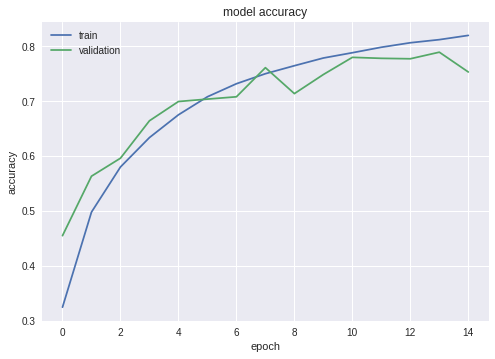

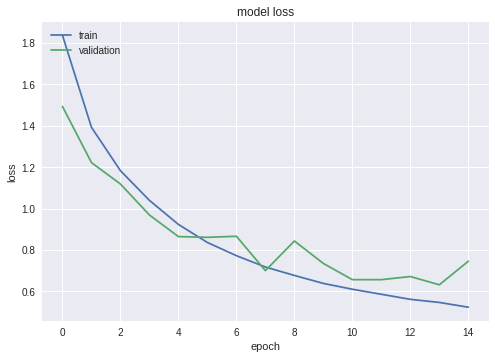

In [245]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()